# Webscraping

In [550]:
import requests
from bs4 import BeautifulSoup as BS
import pandas as pd
import json
import requests
import config
import mysql.connector
from mysql.connector import errorcode
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import scipy.stats as stats
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import Lasso, Ridge, LinearRegression

In [144]:
db_name = 'regression_proj'
cnx = mysql.connector.connect(
    host = config.host,
    user = config.user,
    passwd = config.passwd,
    database = db_name
)
cursor = cnx.cursor()

In [83]:
states = ["Alabama","Alaska","Arizona","Arkansas","California","Colorado",
  "Connecticut","Delaware","Florida","Georgia","Hawaii","Idaho","Illinois",
  "Indiana","Iowa","Kansas","Kentucky","Louisiana","Maine","Maryland",
  "Massachusetts","Michigan","Minnesota","Mississippi","Missouri","Montana",
  "Nebraska","Nevada","New Hampshire","New Jersey","New Mexico","New York",
  "North Carolina","North Dakota","Ohio","Oklahoma","Oregon","Pennsylvania",
  "Rhode Island","South Carolina","South Dakota","Tennessee","Texas","Utah",
  "Vermont","Virginia","Washington","West Virginia","Wisconsin","Wyoming"]

In [2]:
headers = {'user-agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_6) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/53.0.2785.143 Safari/537.36'}
def get_page(url):
    try:
        page = requests.get(url, headers = headers, timeout=5)
    # include code to do status check
        if page.status_code != 200:
            print(page.status_code)
        ##we should maybe add the url to a list?
    except requests.ConnectionError as e:
        print("OOPS!! Connection Error. Make sure you are connected to Internet. Technical Details given below.\n")
        print(str(e))
    except requests.Timeout as e:
        print("OOPS!! Timeout Error")
        print(str(e))
    except requests.RequestException as e:
        print("OOPS!! General Error")
        print(str(e))
    except KeyboardInterrupt:
        print("Someone closed the program") 

In [60]:
url = 'https://www.beeradvocate.com/beer/profile/220/232372/'

In [10]:
get_page(url)

In [61]:
page = requests.get(url)
soup = BS(page.content, 'html.parser')
print(soup.prettify())

<!DOCTYPE html>
<html class="Public NoJs uix_javascriptNeedsInit LoggedOut Sidebar Responsive pageIsLtr not_hasTabLinks hasSearch is-sidebarOpen hasRightSidebar is-setWidth navStyle_0 pageStyle_0 hasFlexbox" dir="LTR" id="XenForo" lang="en-US" xmlns:fb="http://www.facebook.com/2008/fbml">
 <head>
  <meta charset="utf-8"/>
  <meta content="IE=Edge,chrome=1" http-equiv="X-UA-Compatible"/>
  <meta content="width=device-width, initial-scale=1" name="viewport"/>
  <base href="https://www.beeradvocate.com/community/"/>
  <script>
   var _b = document.getElementsByTagName('base')[0], _bH = "https://www.beeradvocate.com/community/";
			if (_b && _b.href != _bH) _b.href = _bH;
  </script>
  <title>
   12th Of Never Ale | Lagunitas Brewing Company | BeerAdvocate
  </title>
  <noscript>
   <style>
    .JsOnly, .jsOnly { display: none !important; }
   </style>
  </noscript>
  <link href="css.php?css=xenforo,form,public&amp;style=6&amp;dir=LTR&amp;d=1571223985" rel="stylesheet"/>
  <link href="css.

In [90]:
data = soup.findAll(class_ = 'beerstats')

In [84]:
rating = soup.find(class_ = 'ba-ravg Tooltip').get_text()

In [63]:
score = soup.find(class_ = 'ba-score Tooltip').get_text()

In [64]:
no_reviews = soup.find(class_ = 'ba-reviews Tooltip').get_text()

In [65]:
no_ratings = soup.find(class_ = 'ba-ratings Tooltip').get_text()

In [66]:
abv = soup.findAll(title="Percentage of alcohol by volume.")[1].get_text()

In [67]:
avail = soup.findAll(title="The beer's availability.")[1].get_text()

In [68]:
style = soup.find(title="Learn more about this style.").get_text()

In [27]:
soup.findAll(class_ = 'beerstats')

[<dl class="beerstats">
 <dt class="beerstats muted"><span class="Tooltip" title="Style category and style ranking (if any)."><b>Style:</b></span></dt>
 <dd class="beerstats"><a class="Tooltip" href="/beer/styles/97/" title="Learn more about this style."><b>American Pale Ale (APA)</b></a><br/><a class="Tooltip" href="/beer/top-styles/97/" title="Ranking within the style. Click to view the Top Rated Beers for this style.">Ranked #275</a></dd>
 <dt class="beerstats muted"><span class="Tooltip" title="Percentage of alcohol by volume."><b>ABV:</b></span></dt>
 <dd class="beerstats"> <span class="Tooltip" title="Percentage of alcohol by volume."><b>5.5%</b></span></dd>
 <dt class="beerstats muted"><span class="Tooltip" title="The official BeerAdvocate (BA) Score for this beer."><b>Score:</b></span></dt>
 <dd class="beerstats"><span class="ba-score Tooltip" title="The official BeerAdvocate (BA) Score for this beer."><b>89</b></span><br/><a class="Tooltip" href="/beer/top-rated/" title="Ranki

In [70]:
soup.findAll(title="Percentage of alcohol by volume.")[1].get_text()

'5.5%'

In [153]:
url = 'https://www.beeradvocate.com/beer/profile/209/300514/'

In [154]:
page = requests.get(url)
soup = BS(page.content, 'html.parser')
soup.findAll(class_ = 'beerstats')

[<dl class="beerstats">
 <dt class="beerstats muted"><span class="Tooltip" title="Style category and style ranking (if any)."><b>Style:</b></span></dt>
 <dd class="beerstats"><a class="Tooltip" href="/beer/styles/95/" title="Learn more about this style."><b>Foreign / Export Stout</b></a><br/><a class="Tooltip" href="/beer/top-styles/95/" title="Ranking within the style. Click to view the Top Rated Beers for this style.">Ranked #14</a></dd>
 <dt class="beerstats muted"><span class="Tooltip" title="Percentage of alcohol by volume."><b>ABV:</b></span></dt>
 <dd class="beerstats"> <span class="Tooltip" title="Percentage of alcohol by volume."><b>6%</b></span></dd>
 <dt class="beerstats muted"><span class="Tooltip" title="The official BeerAdvocate (BA) Score for this beer."><b>Score:</b></span></dt>
 <dd class="beerstats"><span class="ba-score Tooltip" title="The official BeerAdvocate (BA) Score for this beer."><b>90</b></span><br/><a class="Tooltip" href="/beer/top-rated/" title="Ranking a

In [138]:
len(soup.findAll(title="Percentage of alcohol by volume."))

1

In [73]:
no_reviews

'268'

In [75]:
list_urls = ['https://www.beeradvocate.com/beer/profile/220/232372/', 'https://www.beeradvocate.com/beer/profile/18149/114736/']

In [158]:
def get_beer_info(list_urls):
    list_info = []
    for url in list_urls:
        print(url)
        page = requests.get(url)
        soup = BS(page.content, 'html.parser')
        data = soup.findAll(class_ = 'beerstats')
        rating = soup.find(class_ = 'ba-ravg Tooltip').get_text()
        if not soup.find(class_ = 'ba-score Tooltip'):
            score = None
        else:
            score = soup.find(class_ = 'ba-score Tooltip').get_text()
        no_reviews = soup.find(class_ = 'ba-reviews Tooltip').get_text()
        no_ratings = soup.find(class_ = 'ba-ratings Tooltip').get_text()
        if len(soup.findAll(title="Percentage of alcohol by volume.")) == 1:
            abv = None
        else:
            abv = soup.findAll(title="Percentage of alcohol by volume.")[1].get_text()
        avail = soup.findAll(title="The beer's availability.")[1].get_text()
        style = soup.find(title="Learn more about this style.").get_text()
        state = [d.get_text().split(',')[0] for d in data if d.get_text().split(',')[0] in states]
        if len(state) == 0:
            place = 'World'
        else:
            place = state[0]
        beer_info = (rating, score, no_reviews, no_ratings, abv, avail, style, place)
        list_info.append(beer_info)
    return list_info


In [118]:
get_beer_info(list_urls)

[('3.97',
  '89',
  '268',
  '1,099',
  '5.5%',
  'Rotating',
  'American Pale Ale (APA)',
  'California'),
 ('4.06',
  '89',
  '10',
  '102',
  '12.6%',
  'Retired (no longer brewed)',
  'American Strong Ale',
  'California')]

In [157]:
state = [d.get_text().split(',')[0] for d in data if d.get_text().split(',')[0] in states]
len(state)

0

In [116]:
state[0]

'California'

In [95]:
data[0].get_text()

'\nStyle:\nAmerican Strong Ale\nABV:\n 12.6%\nScore:\n89'

In [155]:
data = soup.findAll('dd', class_ = 'beerstats')

In [108]:
data[7].get_text().split(',')[0]

'California'

In [159]:
list_tuples_100 = get_beer_info(list_first_100)

https://www.beeradvocate.com/beer/profile/220/232372/
https://www.beeradvocate.com/beer/profile/18149/114736/
https://www.beeradvocate.com/beer/profile/20/331599/
https://www.beeradvocate.com/beer/profile/273/115662/
https://www.beeradvocate.com/beer/profile/273/156776/
https://www.beeradvocate.com/beer/profile/273/207521/
https://www.beeradvocate.com/beer/profile/29/256852/
https://www.beeradvocate.com/beer/profile/273/751/
https://www.beeradvocate.com/beer/profile/209/300514/
https://www.beeradvocate.com/beer/profile/140/262103/
https://www.beeradvocate.com/beer/profile/140/75027/
https://www.beeradvocate.com/beer/profile/1416/117688/
https://www.beeradvocate.com/beer/profile/1146/93267/
https://www.beeradvocate.com/beer/profile/393/14286/
https://www.beeradvocate.com/beer/profile/140/58735/
https://www.beeradvocate.com/beer/profile/140/56761/
https://www.beeradvocate.com/beer/profile/140/63152/
https://www.beeradvocate.com/beer/profile/140/60474/
https://www.beeradvocate.com/beer/pr

In [161]:
list_tuples_200 = get_beer_info(list_200)

https://www.beeradvocate.com/beer/profile/335/60837/
https://www.beeradvocate.com/beer/profile/20/189607/
https://www.beeradvocate.com/beer/profile/29/30727/
https://www.beeradvocate.com/beer/profile/140/88880/
https://www.beeradvocate.com/beer/profile/140/152542/
https://www.beeradvocate.com/beer/profile/140/113859/
https://www.beeradvocate.com/beer/profile/9784/181990/
https://www.beeradvocate.com/beer/profile/2210/81490/
https://www.beeradvocate.com/beer/profile/2681/160088/
https://www.beeradvocate.com/beer/profile/9784/328505/
https://www.beeradvocate.com/beer/profile/69/2117/
https://www.beeradvocate.com/beer/profile/113/17283/
https://www.beeradvocate.com/beer/profile/596/5219/
https://www.beeradvocate.com/beer/profile/9784/43167/
https://www.beeradvocate.com/beer/profile/13307/113093/
https://www.beeradvocate.com/beer/profile/140/135687/
https://www.beeradvocate.com/beer/profile/6754/59217/
https://www.beeradvocate.com/beer/profile/596/2669/
https://www.beeradvocate.com/beer/pr

In [162]:
len(list_tuples_200)

55

In [165]:
list_tuples_300 = get_beer_info(list_300)

https://www.beeradvocate.com/beer/profile/29/111575/
https://www.beeradvocate.com/beer/profile/220/2264/
https://www.beeradvocate.com/beer/profile/273/329595/
https://www.beeradvocate.com/beer/profile/1386/4371/
https://www.beeradvocate.com/beer/profile/15834/44021/
https://www.beeradvocate.com/beer/profile/29/341032/
https://www.beeradvocate.com/beer/profile/29/51464/
https://www.beeradvocate.com/beer/profile/273/279629/
https://www.beeradvocate.com/beer/profile/9408/310638/
https://www.beeradvocate.com/beer/profile/2681/133524/
https://www.beeradvocate.com/beer/profile/220/20445/
https://www.beeradvocate.com/beer/profile/29/3092/
https://www.beeradvocate.com/beer/profile/29/333220/
https://www.beeradvocate.com/beer/profile/20/2415/
https://www.beeradvocate.com/beer/profile/29/76899/
https://www.beeradvocate.com/beer/profile/29952/157197/
https://www.beeradvocate.com/beer/profile/335/3914/
https://www.beeradvocate.com/beer/profile/22459/101329/
https://www.beeradvocate.com/beer/profil

In [168]:
list_tuples_400 = get_beer_info(list_400)

https://www.beeradvocate.com/beer/profile/273/59770/
https://www.beeradvocate.com/beer/profile/273/98525/
https://www.beeradvocate.com/beer/profile/335/36835/
https://www.beeradvocate.com/beer/profile/335/197840/
https://www.beeradvocate.com/beer/profile/209/650/
https://www.beeradvocate.com/beer/profile/2953/234118/
https://www.beeradvocate.com/beer/profile/34980/176981/
https://www.beeradvocate.com/beer/profile/12985/137703/
https://www.beeradvocate.com/beer/profile/25941/100185/
https://www.beeradvocate.com/beer/profile/48508/408169/
https://www.beeradvocate.com/beer/profile/140/127725/
https://www.beeradvocate.com/beer/profile/25593/80469/
https://www.beeradvocate.com/beer/profile/335/57401/
https://www.beeradvocate.com/beer/profile/273/201481/
https://www.beeradvocate.com/beer/profile/220/3451/
https://www.beeradvocate.com/beer/profile/15834/116924/
https://www.beeradvocate.com/beer/profile/220/254756/
https://www.beeradvocate.com/beer/profile/220/73131/
https://www.beeradvocate.c

In [221]:
# list_tuples_600= get_beer_info(list_600)
# list_tuples_700 = get_beer_info(list_700)
# list_tuples_800 = get_beer_info(list_800)
# list_tuples_900 = get_beer_info(list_900)
# list_tuples_1000 = get_beer_info(list_1000)
list_tuples_last = get_beer_info(list_last)

https://www.beeradvocate.com/beer/profile/140/69070/
https://www.beeradvocate.com/beer/profile/34100/115183/
https://www.beeradvocate.com/beer/profile/140/168684/
https://www.beeradvocate.com/beer/profile/2062/5346/
https://www.beeradvocate.com/beer/profile/105/324609/
https://www.beeradvocate.com/beer/profile/220/297906/
https://www.beeradvocate.com/beer/profile/273/325955/
https://www.beeradvocate.com/beer/profile/18854/198920/
https://www.beeradvocate.com/beer/profile/83/248/
https://www.beeradvocate.com/beer/profile/31805/334559/
https://www.beeradvocate.com/beer/profile/335/122265/
https://www.beeradvocate.com/beer/profile/2137/83137/
https://www.beeradvocate.com/beer/profile/140/226496/
https://www.beeradvocate.com/beer/profile/586/10095/
https://www.beeradvocate.com/beer/profile/335/254692/
https://www.beeradvocate.com/beer/profile/2137/310026/
https://www.beeradvocate.com/beer/profile/596/21724/
https://www.beeradvocate.com/beer/profile/9784/190897/
https://www.beeradvocate.com

In [222]:
stmt = """INSERT INTO beer_info(beer_rating, ba_score, no_reviews, no_ratings, abv, avail, style, state) 
             VALUES (%s, %s, %s, %s, %s, %s, %s, %s)"""

cursor.executemany(stmt, list_tuples_last) #this is the last one that HAS been executed
cnx.commit()

In [223]:
cursor.execute("""SELECT *
                    FROM regression_proj.beer_info""")
#quick look at the df
df = pd.DataFrame(cursor.fetchall())
df.columns = [x[0] for x in cursor.description]
df

,beer_rating,ba_score,no_reviews,no_ratings,abv,avail,style,state
0,3.97,89.0,268,1,5.5,Rotating,American Pale Ale (APA),California
1,4.06,89.0,10,102,12.6,Retired (no longer brewed),American Strong Ale,California
2,3.90,NaN,6,9,4.5,Retired (no longer brewed),American Stout,Massachusetts
3,3.76,85.0,15,102,9.0,Retired (no longer brewed),Belgian Saison,Georgia
4,3.94,87.0,13,53,10.0,Retired (no longer brewed),Belgian Tripel,Georgia
5,4.03,87.0,15,35,7.0,Retired (no longer brewed),Belgian Pale Ale,Georgia
6,2.94,NaN,1,2,5.0,Rotating,American Amber / Red Lager,Missouri
7,3.66,83.0,839,3,5.4,Year-round,American Pale Ale (APA),Georgia
8,4.02,90.0,161,460,6.0,Rotating,Foreign / Export Stout,World
9,3.88,87.0,129,422,6.5,Retired (no longer brewed),American IPA,California


In [250]:
df.isna().sum()

beer_rating      0
ba_score       115
no_reviews       0
no_ratings       0
abv             25
avail            0
style            0
state            0
style_cat        0
dtype: int64

In [245]:
state_list = df['state'].to_list()

In [247]:
state_list = to_unique(state_list)
state_list

['Arizona',
 'Maine',
 'New Jersey',
 'North Carolina',
 'Minnesota',
 'Georgia',
 'Vermont',
 'Oregon',
 'World',
 'Missouri',
 'Indiana',
 'Utah',
 'Delaware',
 'Maryland',
 'Michigan',
 'California',
 'Wisconsin',
 'Idaho',
 'Montana',
 'Illinois',
 'Nevada',
 'New Hampshire',
 'New Mexico',
 'Kentucky',
 'Ohio',
 'Tennessee',
 'Washington',
 'Colorado',
 'Louisiana',
 'Connecticut',
 'Massachusetts',
 'Virginia',
 'Iowa',
 'New York',
 'Florida',
 'Texas',
 'Pennsylvania']

In [226]:
def to_unique(a_list):
    my_set = set(a_list)
    return list(my_set)

In [233]:
set_styles = to_unique(style_list)

In [228]:
len(set_styles)

88

In [229]:
df.to_csv('beer_info.csv', index=False)

In [231]:
df = pd.read_csv('beer_info.csv')

In [ ]:
pd.plotting.scatter_matrix(df, figsize  = [12, 12])
plt.figsave('initial_scatter_matrix.jpg');

In [552]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
formula = "ba_score ~ abv"
model = ols(formula= formula, data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               ba_score   R-squared:                       0.235
Model:                            OLS   Adj. R-squared:                  0.234
Method:                 Least Squares   F-statistic:                     189.5
Date:                Thu, 17 Oct 2019   Prob (F-statistic):           8.70e-38
Time:                        15:51:09   Log-Likelihood:                -793.52
No. Observations:                 618   AIC:                             1591.
Df Residuals:                     616   BIC:                             1600.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -6.974e-16      0.035  -1.98e-14      1.000      -0.069       0.069
abv            0.4850      0.035     13.766      0.000       0.416       0.554
==============================================================================
Omnibus:                      291.156   Durbin-Watson:                   1.737
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1265.100
Skew:                          -2.196   Prob(JB):                    1.94e-275
Kurtosis:                       8.462   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [234]:
set_styles

['American Amber / Red Lager',
 'American Light Lager',
 'American Wild Ale',
 'Baltic Porter',
 'Scottish Ale',
 'American Black Ale',
 'European Pale Lager',
 'American Imperial IPA',
 'English Old Ale',
 'German Kölsch',
 'Belgian Witbier',
 'Finnish Sahti',
 'English Oatmeal Stout',
 'German Märzen / Oktoberfest',
 'German Maibock',
 'American Porter',
 'American Pale Wheat Ale',
 'American Amber / Red Ale',
 'Leipzig Gose',
 'English Bitter',
 'Scottish Gruit / Ancient Herbed Ale',
 'Munich Dunkel Lager',
 'California Common / Steam Beer',
 'English Extra Special / Strong Bitter (ESB)',
 'German Altbier',
 'Belgian IPA',
 'Berliner Weisse',
 'English Sweet / Milk Stout',
 'Russian Imperial Stout',
 'New England IPA',
 'Scotch Ale / Wee Heavy',
 'German Dunkelweizen',
 'Vienna Lager',
 'British Barleywine',
 'English Porter',
 'Winter Warmer',
 'American Cream Ale',
 'European Dark Lager',
 'Foreign / Export Stout',
 'English India Pale Ale (IPA)',
 'Irish Red Ale',
 'German Keller

In [242]:
hoppy_style = ['American Pale Ale (APA)','American IPA','English Pale Ale','Belgian Strong Pale Ale','English India Pale Ale (IPA)','New England IPA','American Imperial IPA','Belgian IPA']
belgian_style = ['Belgian Dark Ale','Belgian Tripel','Belgian Pale Ale','Belgian Saison','Belgian Dubbel','Belgian Quadrupel (Quad)','German Hefeweizen','Belgian Witbier']
light_style = ['Low Alcohol Beer','American Lager','German Weizenbock','Bohemian Pilsener','Belgian Blonde Ale ','American Imperial Pilsner','German Kristalweizen','American Blonde Ale','German Pilsner','German Helles','American Adjunct Lager','German Kellerbier / Zwickelbier','American Cream Ale','Vienna Lager','California Common / Steam Beer','American Light Lager','European Pale Lager','German Kölsch','German Maibock','American Pale Wheat Ale','Munich Dunkel Lager']
seasonal_style = ['Pumpkin Beer','Herb and Spice Beer','Winter Warmer','German Märzen / Oktoberfest']
amber_style = ['American Brown Ale','German Bock','English Brown Ale','American Imperial Red Ale','Rye Beer','French Bière de Garde','Irish Red Ale','Scotch Ale / Wee Heavy','German Altbier','English Extra Special / Strong Bitter (ESB)','American Amber / Red Lager','Scottish Ale','English Old Ale','American Amber / Red Ale','English Bitter']
wild_style = ['Fruit and Field Beer','Smoke Beer','Berliner Weisse','American Wild Ale','Leipzig Gose', 'Scottish Gruit / Ancient Herbed Ale']
dark_style = ['American Malt Liquor','American Strong Ale','Irish Dry Stout','American Stout','American Barleywine','American Imperial Stout','English Strong Ale','American Imperial Porter','American Wheatwine Ale','American Dark Wheat Ale','British Barleywine','German Schwarzbier','Robust Porter ','English Dark Mild Ale','German Doppelbock','Foreign / Export Stout','European Dark Lager','English Porter','German Dunkelweizen','Russian Imperial Stout','English Sweet / Milk Stout','Baltic Porter','American Black Ale','Finnish Sahti','English Oatmeal Stout','American Porter']

In [261]:
for i, beer in df.iterrows():
    if beer['style'] in hoppy_style:
        df['style_cat'][i] = 'hoppy'
    elif beer['style'] in belgian_style:
        df['style_cat'][i] = 'belgian'
    elif beer['style'] in light_style:
        df['style_cat'][i] = 'light'
    elif beer['style'] in seasonal_style:
        df['style_cat'][i] = 'seasonal'
    elif beer['style'] in amber_style:
        df['style_cat'][i] = 'amber'
    elif beer['style'] in wild_style:
        df['style_cat'][i] = 'wild'
    else:
        df['style_cat'][i] = 'dark'

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
//anaconda3/lib/python3.7/site-pa

In [262]:
df['style_cat'].value_counts()

hoppy       214
dark        175
light       113
amber       101
belgian      61
wild         58
seasonal     23
Name: style_cat, dtype: int64

In [263]:
df

,beer_rating,ba_score,no_reviews,no_ratings,abv,avail,style,state,style_cat
0,3.97,89.0,268,1,5.5,Rotating,American Pale Ale (APA),California,hoppy
1,4.06,89.0,10,102,12.6,Retired (no longer brewed),American Strong Ale,California,dark
2,3.90,NaN,6,9,4.5,Retired (no longer brewed),American Stout,Massachusetts,dark
3,3.76,85.0,15,102,9.0,Retired (no longer brewed),Belgian Saison,Georgia,belgian
4,3.94,87.0,13,53,10.0,Retired (no longer brewed),Belgian Tripel,Georgia,belgian
5,4.03,87.0,15,35,7.0,Retired (no longer brewed),Belgian Pale Ale,Georgia,belgian
6,2.94,NaN,1,2,5.0,Rotating,American Amber / Red Lager,Missouri,amber
7,3.66,83.0,839,3,5.4,Year-round,American Pale Ale (APA),Georgia,hoppy
8,4.02,90.0,161,460,6.0,Rotating,Foreign / Export Stout,World,dark
9,3.88,87.0,129,422,6.5,Retired (no longer brewed),American IPA,California,hoppy


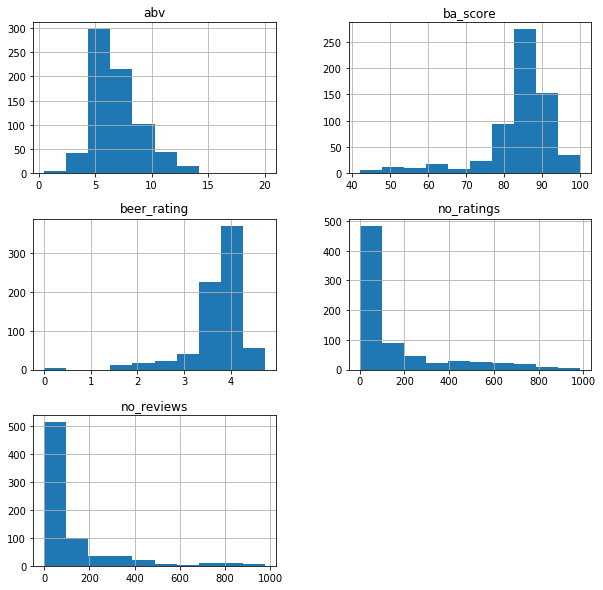

In [267]:
df.hist(figsize = (10,10));

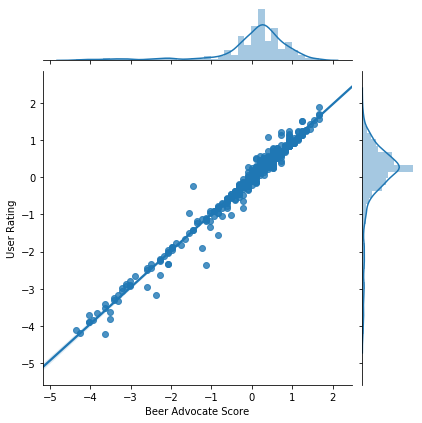

In [542]:
sns.jointplot('ba_score','beer_rating', data=df, kind='reg')
plt.xlabel('Beer Advocate Score')
plt.ylabel('User Rating');

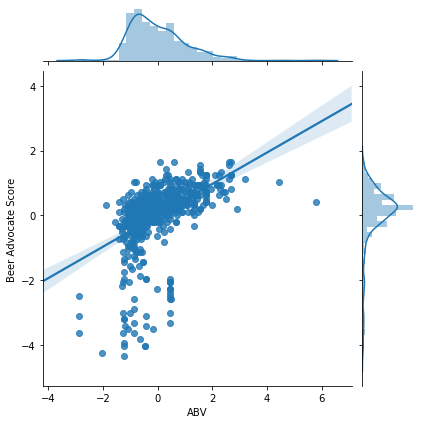

In [554]:
sns.jointplot('abv','ba_score', data=df, kind='reg')
plt.ylabel('Beer Advocate Score')
plt.xlabel('ABV');

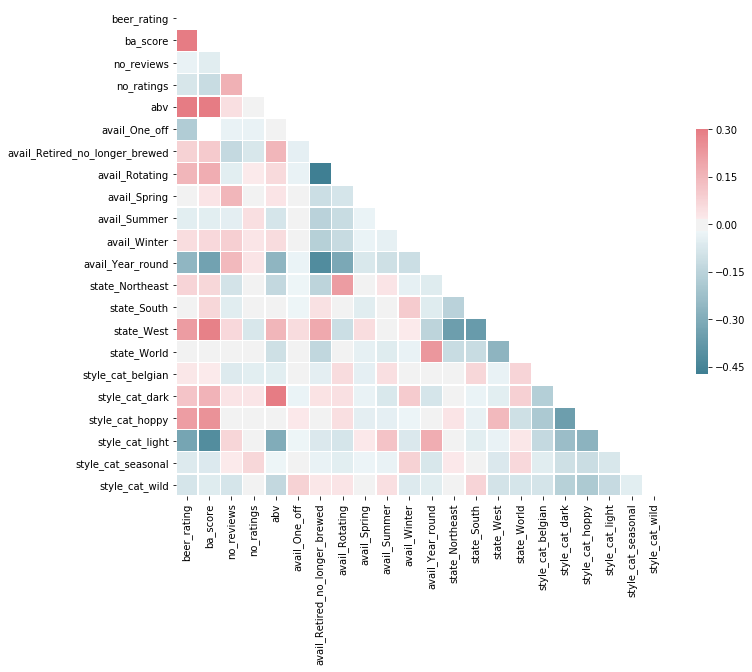

In [383]:
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [295]:
def state_region(df):
    regional={
    'Northeast':['Connecticut', 'Maine', 'Massachusetts', 'New Hampshire', 'Rhode Island', 'Vermont','New York', 'New Jersey', 'Pennsylvania'],
    'Midwest':['Illinois', 'Indiana', 'Michigan', 'Ohio', 'Wisconsin', 'Iowa', 'Kansas', 'Minnesota', 'Missouri', 'Nebraska', 'North Dakota', 'South Dakota'],
    'South':['Delaware', 'Florida', 'Georgia', 'Maryland', 'North Carolina', 'South Carolina', 'Virginia','West Virginia', 'Alabama', 'Kentucky', 'Mississippi', 'Tennessee', 'Arkansas', 'Louisiana', 'Oklahoma', 'Texas'],
    'West':['Arizona', 'Colorado', 'Idaho', 'Montana', 'Nevada', 'New Mexico', 'Utah', 'Wyoming', 'Alaska', 'California', 'Hawaii', 'Oregon', 'Washington']
    }
    for region in regional.keys():
        df['state'] = df['state'].map(lambda u: region if u in regional[region] else u)
    return df

In [299]:
df = state_region(df)
df['state'].unique()

array(['West', 'Northeast', 'South', 'Midwest', 'World'], dtype=object)

In [311]:
df.drop(columns='avail', inplace=True)

In [312]:
df.head()

,beer_rating,ba_score,no_reviews,no_ratings,abv,state,style_cat
0,3.97,89.0,268,1,5.5,West,hoppy
1,4.06,89.0,10,102,12.6,West,dark
2,3.90,NaN,6,9,4.5,Northeast,dark
3,3.76,85.0,15,102,9.0,South,belgian
4,3.94,87.0,13,53,10.0,South,belgian


In [302]:
feats = ['avail', 'state', 'style_cat']
cat_df = df[feats]
cat_df = pd.get_dummies(cat_df, drop_first=True)

In [303]:
cat_df.head()

,avail_One-off,avail_Retired (no longer brewed),avail_Rotating,avail_Spring,avail_Summer,avail_Winter,avail_Year-round,state_Northeast,state_South,state_West,state_World,style_cat_belgian,style_cat_dark,style_cat_hoppy,style_cat_light,style_cat_seasonal,style_cat_wild
0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0
1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
2,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0
3,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0
4,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0


In [317]:
pd.concat([df, cat_df], ignore_index=True, axis=1)

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,3.97,89.0,268,1,5.5,West,hoppy,0,0,1,...,0,0,1,0,0,0,1,0,0,0
1,4.06,89.0,10,102,12.6,West,dark,0,1,0,...,0,0,1,0,0,1,0,0,0,0
2,3.90,NaN,6,9,4.5,Northeast,dark,0,1,0,...,1,0,0,0,0,1,0,0,0,0
3,3.76,85.0,15,102,9.0,South,belgian,0,1,0,...,0,1,0,0,1,0,0,0,0,0
4,3.94,87.0,13,53,10.0,South,belgian,0,1,0,...,0,1,0,0,1,0,0,0,0,0
5,4.03,87.0,15,35,7.0,South,belgian,0,1,0,...,0,1,0,0,1,0,0,0,0,0
6,2.94,NaN,1,2,5.0,Midwest,amber,0,0,1,...,0,0,0,0,0,0,0,0,0,0
7,3.66,83.0,839,3,5.4,South,hoppy,0,0,0,...,0,1,0,0,0,0,1,0,0,0
8,4.02,90.0,161,460,6.0,World,dark,0,0,1,...,0,0,0,1,0,1,0,0,0,0
9,3.88,87.0,129,422,6.5,West,hoppy,0,1,0,...,0,0,1,0,0,0,1,0,0,0


In [320]:
df = df.join(cat_df)

In [321]:
df.shape

(745, 24)

In [327]:
df.isna().sum()

beer_rating                           0
ba_score                            115
no_reviews                            0
no_ratings                            0
abv                                  25
state                                 0
style_cat                             0
avail_One-off                         0
avail_Retired (no longer brewed)      0
avail_Rotating                        0
avail_Spring                          0
avail_Summer                          0
avail_Winter                          0
avail_Year-round                      0
state_Northeast                       0
state_South                           0
state_West                            0
state_World                           0
style_cat_belgian                     0
style_cat_dark                        0
style_cat_hoppy                       0
style_cat_light                       0
style_cat_seasonal                    0
style_cat_wild                        0
dtype: int64

In [323]:
df.to_csv("cleaned_beer.csv")

In [411]:
df = pd.read_csv('cleaned_beer.csv', index_col=0)

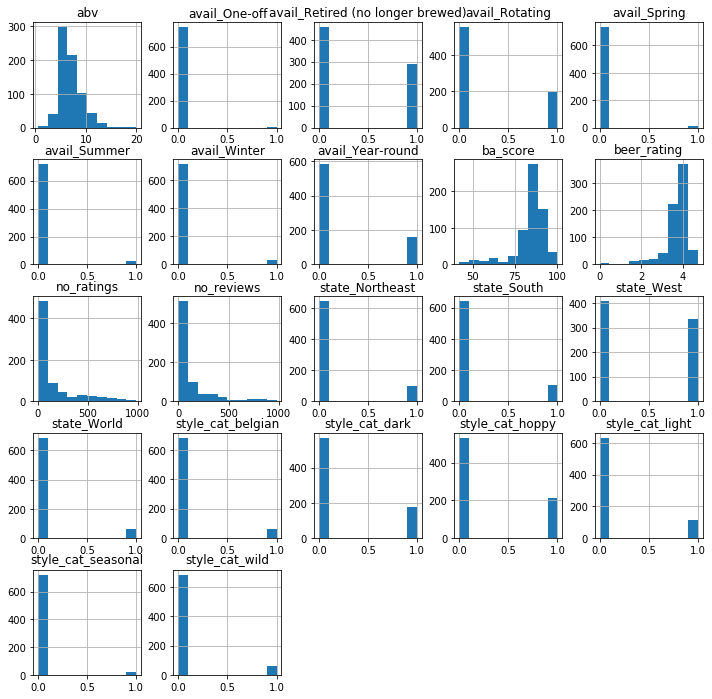

In [412]:
df.hist(figsize = (12,12));

In [413]:
subs = [(' ', '_'),('(',''),(")",""), ('-','_')
       ]
def col_formatting(col):
    for old, new in subs:
        col = col.replace(old,new)
    return col

In [414]:
df.columns = [col_formatting(col) for col in df.columns]

In [415]:
list(df.columns)

['beer_rating',
 'ba_score',
 'no_reviews',
 'no_ratings',
 'abv',
 'state',
 'style_cat',
 'avail_One_off',
 'avail_Retired_no_longer_brewed',
 'avail_Rotating',
 'avail_Spring',
 'avail_Summer',
 'avail_Winter',
 'avail_Year_round',
 'state_Northeast',
 'state_South',
 'state_West',
 'state_World',
 'style_cat_belgian',
 'style_cat_dark',
 'style_cat_hoppy',
 'style_cat_light',
 'style_cat_seasonal',
 'style_cat_wild']

In [525]:
outcome = 'ba_score'
x_cols = list(df.columns)
x_cols.remove(outcome)
x_cols.remove('beer_rating')
x_cols.remove('avail_One_off')
x_cols.remove('style_cat')
x_cols.remove('state')
x_cols.remove('no_reviews')
print(x_cols)
# formula = "outcome ~ abv"
# model = ols(formula= formula, data=df).fit()
# model.summary()

['no_ratings', 'abv', 'avail_Retired_no_longer_brewed', 'avail_Rotating', 'avail_Spring', 'avail_Summer', 'avail_Winter', 'avail_Year_round', 'state_Northeast', 'state_South', 'state_West', 'state_World', 'style_cat_belgian', 'style_cat_dark', 'style_cat_hoppy', 'style_cat_light', 'style_cat_seasonal', 'style_cat_wild']


In [464]:
train, test = train_test_split(df)

In [549]:
df.describe()

,beer_rating,ba_score,no_reviews,no_ratings,abv,avail_One_off,avail_Retired_no_longer_brewed,avail_Rotating,avail_Spring,avail_Summer,...,state_Northeast,state_South,state_West,state_World,style_cat_belgian,style_cat_dark,style_cat_hoppy,style_cat_light,style_cat_seasonal,style_cat_wild
count,6.180000e+02,6.180000e+02,6.180000e+02,6.180000e+02,6.180000e+02,618.0,618.000000,618.000000,618.000000,618.000000,...,618.000000,618.000000,618.000000,618.000000,618.000000,618.000000,618.000000,618.000000,618.000000,618.000000
mean,4.751503e-15,-7.094289e-16,2.339014e-16,4.706771e-17,2.901131e-15,0.0,0.355987,0.258900,0.017799,0.038835,...,0.121359,0.134304,0.448220,0.079288,0.077670,0.245955,0.283172,0.148867,0.033981,0.074434
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.0,0.479199,0.438385,0.132329,0.193358,...,0.326809,0.341255,0.497714,0.270407,0.267868,0.431001,0.450904,0.356246,0.181326,0.262688
min,-4.236402e+00,-4.351100e+00,-6.666722e-01,-7.250932e-01,-2.873109e+00,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-2.072687e-01,-2.118200e-01,-6.318473e-01,-6.858654e-01,-7.459690e-01,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.319259e-01,2.021081e-01,-4.328479e-01,-4.919058e-01,-2.141840e-01,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,5.565480e-01,5.125541e-01,1.927565e-01,2.730357e-01,4.948626e-01,0.0,1.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,1.912323e+00,1.650856e+00,4.193889e+00,3.568169e+00,5.768397e+00,0.0,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [527]:
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               ba_score   R-squared:                       0.537
Model:                            OLS   Adj. R-squared:                  0.518
Method:                 Least Squares   F-statistic:                     28.63
Date:                Thu, 17 Oct 2019   Prob (F-statistic):           6.37e-63
Time:                        15:09:34   Log-Likelihood:                -471.30
No. Observations:                 463   AIC:                             980.6
Df Residuals:                     444   BIC:                             1059.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept                         -0.3233      0.218     -1.480      0.140      -0.753       0.106
no_ratings                        -0.0994      0.032     -3.103      0.002      -0.162      -0.036
abv                                0.3520      0.038      9.174      0.000       0.277       0.427
avail_Retired_no_longer_brewed    -0.4189      0.206     -2.029      0.043      -0.825      -0.013
avail_Rotating                    -0.1744      0.210     -0.832      0.406      -0.586       0.238
avail_Spring                      -0.4048      0.327     -1.239      0.216      -1.047       0.237
avail_Summer                      -0.2777      0.266     -1.045      0.296      -0.800       0.244
avail_Winter                      -0.3071      0.249     -1.234      0.218      -0.796       0.182
avail_Year_round                  -0.6558      0.214     -3.063      0.002      -1.077      -0.235
state_Northeast                    0.9493      0.121      7.844      0.000       0.711       1.187
state_South                        0.8923      0.111      8.048      0.000       0.674       1.110
state_West                         0.9131      0.086     10.588      0.000       0.744       1.083
state_World                        0.9243      0.135      6.857      0.000       0.659       1.189
style_cat_belgian                 -0.0155      0.152     -0.102      0.919      -0.313       0.282
style_cat_dark                     0.0442      0.116      0.381      0.704      -0.184       0.272
style_cat_hoppy                    0.2996      0.109      2.741      0.006       0.085       0.514
style_cat_light                   -0.5320      0.123     -4.324      0.000      -0.774      -0.290
style_cat_seasonal                -0.3817      0.199     -1.916      0.056      -0.773       0.010
style_cat_wild                    -0.0881      0.144     -0.614      0.540      -0.370       0.194
==============================================================================
Omnibus:                       52.923   Durbin-Watson:                   2.141
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              115.922
Skew:                          -0.624   Prob(JB):                     6.73e-26
Kurtosis:                       5.110   Cond. No.                         22.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [582]:
x_cols = ['no_ratings', 'abv', 'state_Northeast', 'state_South', 'state_West', 'state_World']
y = df[['ba_score']]
X = df[x_cols]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [545]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)

y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

In [546]:
print(linreg.intercept_)
print(linreg.coef_)

[-0.78024522]
[[-0.05975927  0.50162415  1.12256074  0.94194924  1.02283917  0.94908732]]


In [547]:
train_residuals = y_hat_train - y_train
test_residuals = y_hat_test - y_test
mse_train = np.sum((y_train-y_hat_train)**2)/len(y_train)
mse_test = np.sum((y_test-y_hat_test)**2)/len(y_test)
print('Train RMSE:', np.sqrt(mse_train))
print('Test RMSE:', np.sqrt(mse_test))

Train RMSE: ba_score    0.727529
dtype: float64
Test RMSE: ba_score    0.804212
dtype: float64


In [548]:
from sklearn import metrics
print(metrics.mean_absolute_error(y_test, y_hat_test))

0.549986510096671


In [568]:
model = ols('ba_score~style_cat_belgian+style_cat_dark+style_cat_hoppy+style_cat_light+style_cat_seasonal+style_cat_wild', data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               ba_score   R-squared:                       0.208
Model:                            OLS   Adj. R-squared:                  0.197
Method:                 Least Squares   F-statistic:                     19.94
Date:                Thu, 17 Oct 2019   Prob (F-statistic):           9.97e-21
Time:                        17:38:06   Log-Likelihood:                -595.73
No. Observations:                 463   AIC:                             1205.
Df Residuals:                     456   BIC:                             1234.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             -0.0883      0.112     -0.788      0.431      -0.309       0.132
style_cat_belgian      0.1546      0.192      0.805      0.422      -0.223       0.532
style_cat_dark         0.3912      0.139      2.808      0.005       0.117       0.665
style_cat_hoppy        0.4626      0.137      3.387      0.001       0.194       0.731
style_cat_light       -0.8100      0.153     -5.279      0.000      -1.112      -0.508
style_cat_seasonal    -0.1966      0.242     -0.813      0.416      -0.672       0.278
style_cat_wild        -0.2907      0.180     -1.611      0.108      -0.645       0.064
==============================================================================
Omnibus:                      177.300   Durbin-Watson:                   2.103
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              580.652
Skew:                          -1.800   Prob(JB):                    8.19e-127
Kurtosis:                       7.139   Cond. No.                         8.68
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [607]:
model = ols('ba_score~abv+state_Northeast+state_South+state_West+state_World', data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               ba_score   R-squared:                       0.425
Model:                            OLS   Adj. R-squared:                  0.419
Method:                 Least Squares   F-statistic:                     67.63
Date:                Fri, 18 Oct 2019   Prob (F-statistic):           8.02e-53
Time:                        09:56:09   Log-Likelihood:                -521.46
No. Observations:                 463   AIC:                             1055.
Df Residuals:                     457   BIC:                             1080.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -0.8231      0.074    -11.118      0.000      -0.969      -0.678
abv                 0.4578      0.035     12.902      0.000       0.388       0.528
state_Northeast     1.2109      0.128      9.447      0.000       0.959       1.463
state_South         1.0065      0.118      8.537      0.000       0.775       1.238
state_West          1.0406      0.091     11.412      0.000       0.861       1.220
state_World         0.9226      0.144      6.394      0.000       0.639       1.206
==============================================================================
Omnibus:                       76.953   Durbin-Watson:                   2.150
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              197.414
Skew:                          -0.826   Prob(JB):                     1.36e-43
Kurtosis:                       5.740   Cond. No.                         6.13
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

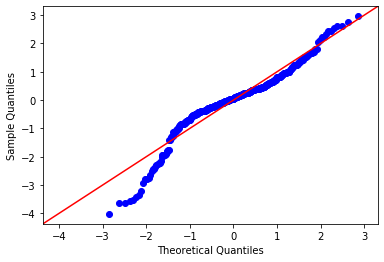

In [576]:
x_cols = ['no_ratings', 'abv', 'state_Northeast', 'state_South', 'state_West', 'state_World']
fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)

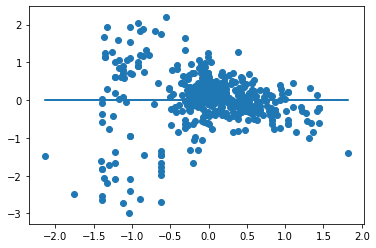

In [577]:
plt.scatter(model.predict(train[x_cols]), model.resid)
plt.plot(model.predict(train[x_cols]), [0 for i in range(len(train))])

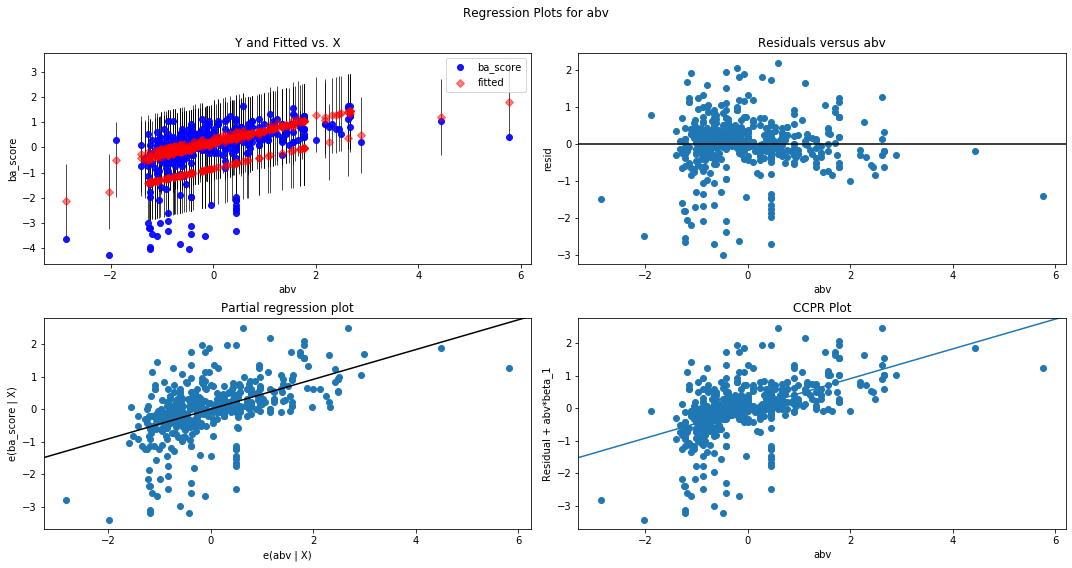

In [534]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, exog_idx='abv', fig=fig)

In [ ]:
model.predict()

# Doing some cleaning

In [387]:
df.describe()

,beer_rating,ba_score,no_reviews,no_ratings,abv,avail_One_off,avail_Retired_no_longer_brewed,avail_Rotating,avail_Spring,avail_Summer,...,state_Northeast,state_South,state_West,state_World,style_cat_belgian,style_cat_dark,style_cat_hoppy,style_cat_light,style_cat_seasonal,style_cat_wild
count,745.000000,630.000000,745.000000,745.000000,720.000000,745.000000,745.000000,745.000000,745.000000,745.000000,...,745.000000,745.000000,745.000000,745.000000,745.000000,745.000000,745.000000,745.000000,745.000000,745.000000
mean,3.712658,84.026984,111.896644,140.320805,6.902000,0.002685,0.387919,0.260403,0.018792,0.036242,...,0.130201,0.136913,0.451007,0.079195,0.081879,0.234899,0.287248,0.151678,0.030872,0.077852
std,0.570853,9.660743,189.608946,217.499012,2.188244,0.051778,0.487603,0.439149,0.135881,0.187016,...,0.336751,0.343986,0.497928,0.270224,0.274365,0.424221,0.452782,0.358949,0.173088,0.268119
min,0.000000,42.000000,0.000000,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.600000,82.000000,3.000000,4.000000,5.300000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.840000,86.000000,21.000000,31.000000,6.500000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4.020000,89.000000,139.000000,180.000000,8.000000,0.000000,1.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,4.730000,100.000000,977.000000,986.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [416]:
df.dropna(inplace=True)

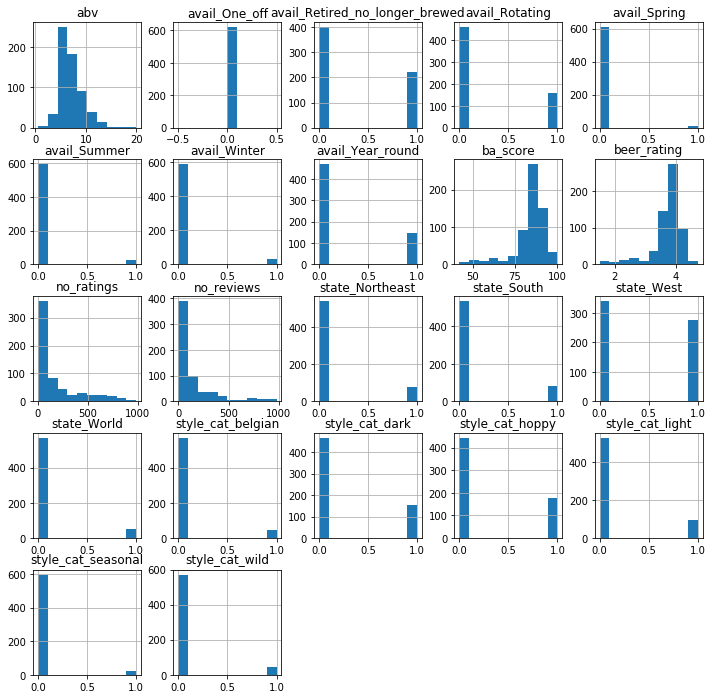

In [417]:
df.hist(figsize=(12,12));

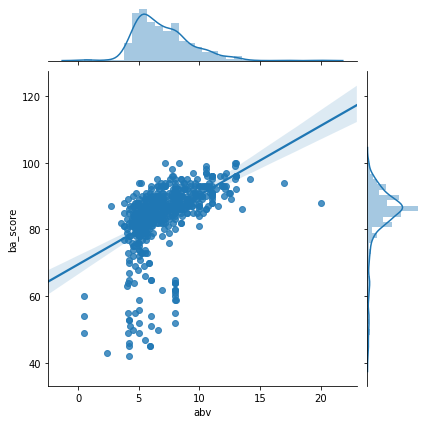

In [436]:
sns.jointplot(df['abv'], df['ba_score'], kind='reg');

In [581]:
x = df[x_cols]
y = df['ba_score']
degree = 2
weights = np.polyfit(x, y, degree)
# model = np.poly1d(weights)
# results = ols(formula="y~model(x)+state_Northeast+state_South+state_West+state_World", data=df).fit()

TypeError: expected 1D vector for x

In [600]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=2)

In [602]:
x_poly = pd.DataFrame(poly_reg.fit_transform(X_train))

In [603]:
lin_reg_2 = LinearRegression()
lin_reg_2.fit(x_poly, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [604]:
x_test_poly = poly_reg.transform(X_test)

In [605]:
y_pred = lin_reg_2.predict(x_test_poly)
np.sqrt(metrics.mean_squared_error(y_test, y_pred)), metrics.r2_score(y_test, y_pred)

(0.7909936758901494, 0.4237420685867399)

In [ ]:
results.summary()

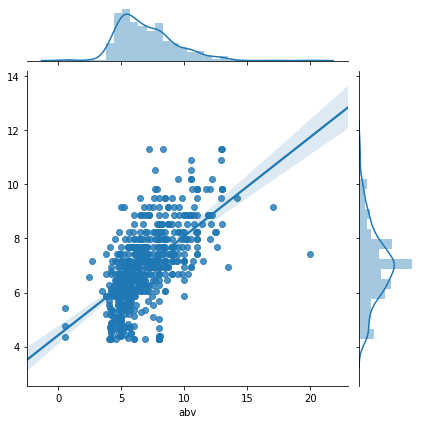

In [458]:
sns.jointplot(y, model(x), kind='reg')

In [454]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.403
Model:                            OLS   Adj. R-squared:                  0.399
Method:                 Least Squares   F-statistic:                     82.76
Date:                Thu, 17 Oct 2019   Prob (F-statistic):           2.39e-66
Time:                        13:59:56   Log-Likelihood:                -1219.8
No. Observations:                 618   AIC:                             2452.
Df Residuals:                     612   BIC:                             2478.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           0.3340      0.373      0.894      0.371      -0.399       1.067
model(x)            1.0420      0.054     19.340      0.000       0.936       1.148
state_Northeast    -1.4230      0.255     -5.579      0.000      -1.924      -0.922
state_South        -0.6526      0.246     -2.650      0.008      -1.136      -0.169
state_West         -0.6009      0.192     -3.128      0.002      -0.978      -0.224
state_World        -1.2301      0.293     -4.195      0.000      -1.806      -0.654
==============================================================================
Omnibus:                      118.263   Durbin-Watson:                   1.794
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              444.675
Skew:                           0.843   Prob(JB):                     2.75e-97
Kurtosis:                       6.798   Cond. No.                         41.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log
  
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in log
  after removing the cwd from sys.path.
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in log
  


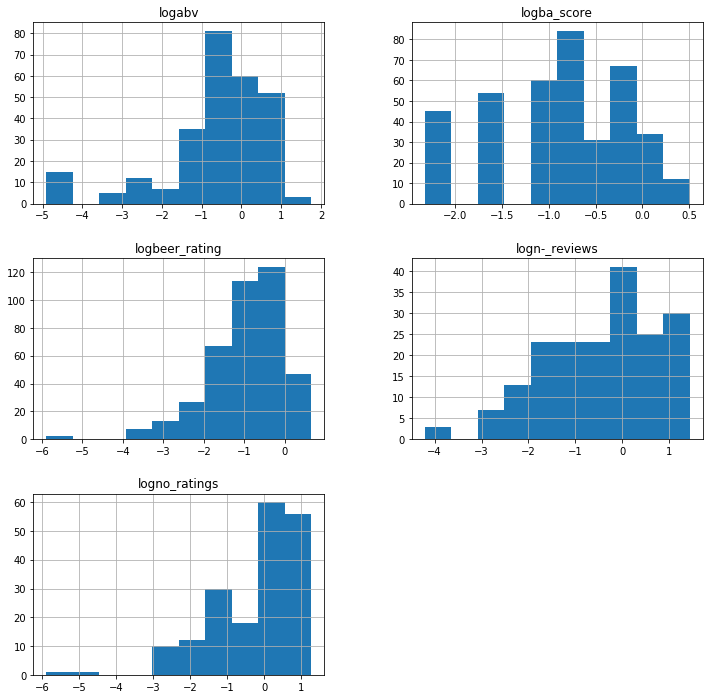

In [463]:
data_log = pd.DataFrame([])
data_log['logabv'] = np.log(df['abv'])
data_log['logba_score'] = np.log(df['ba_score'])
data_log['logbeer_rating'] = np.log(df['beer_rating'])
data_log['logno_ratings'] = np.log(df['no_ratings'])
data_log['logn-_reviews'] = np.log(df['no_reviews'])
data_log.hist(figsize  = [12, 12]);

In [405]:
non_normal = ['no_ratings', 'no_reviews']
for feat in non_normal:
    df[feat] = df[feat].map(lambda x: np.log(x))

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


In [460]:
def norm_feat(series):
    return (series - series.mean())/series.std()

for feat in ['abv', 'ba_score', 'beer_rating', 'no_ratings', 'no_reviews']:
    df[feat] = norm_feat(df[feat])
df.describe()

,beer_rating,ba_score,no_reviews,no_ratings,abv,avail_One_off,avail_Retired_no_longer_brewed,avail_Rotating,avail_Spring,avail_Summer,...,state_Northeast,state_South,state_West,state_World,style_cat_belgian,style_cat_dark,style_cat_hoppy,style_cat_light,style_cat_seasonal,style_cat_wild
count,6.180000e+02,6.180000e+02,6.180000e+02,6.180000e+02,6.180000e+02,618.0,618.000000,618.000000,618.000000,618.000000,...,618.000000,618.000000,618.000000,618.000000,618.000000,618.000000,618.000000,618.000000,618.000000,618.000000
mean,4.751503e-15,-7.094289e-16,2.339014e-16,4.706771e-17,2.901131e-15,0.0,0.355987,0.258900,0.017799,0.038835,...,0.121359,0.134304,0.448220,0.079288,0.077670,0.245955,0.283172,0.148867,0.033981,0.074434
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.0,0.479199,0.438385,0.132329,0.193358,...,0.326809,0.341255,0.497714,0.270407,0.267868,0.431001,0.450904,0.356246,0.181326,0.262688
min,-4.236402e+00,-4.351100e+00,-6.666722e-01,-7.250932e-01,-2.873109e+00,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-2.072687e-01,-2.118200e-01,-6.318473e-01,-6.858654e-01,-7.459690e-01,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.319259e-01,2.021081e-01,-4.328479e-01,-4.919058e-01,-2.141840e-01,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,5.565480e-01,5.125541e-01,1.927565e-01,2.730357e-01,4.948626e-01,0.0,1.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,1.912323e+00,1.650856e+00,4.193889e+00,3.568169e+00,5.768397e+00,0.0,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


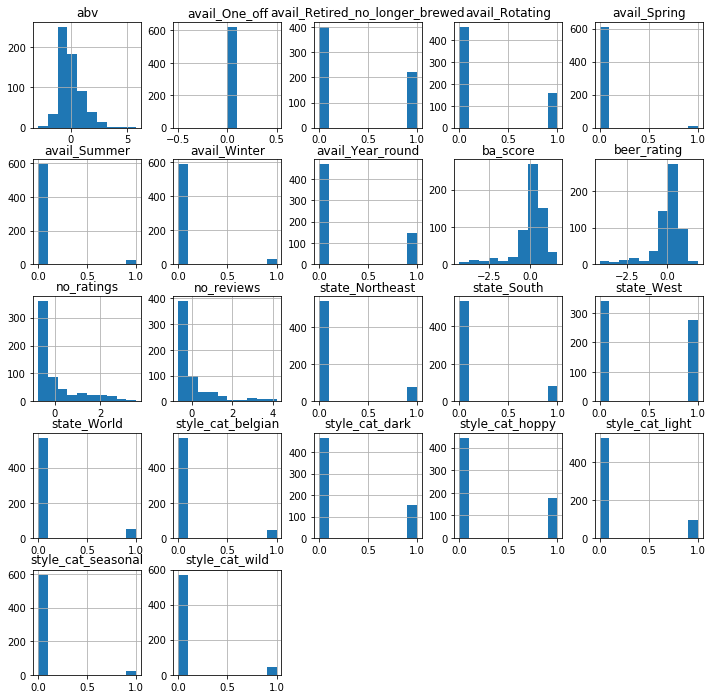

In [462]:
df.hist(figsize=(12,12));

In [399]:
df['abv'] = norm_feat(df['abv'])

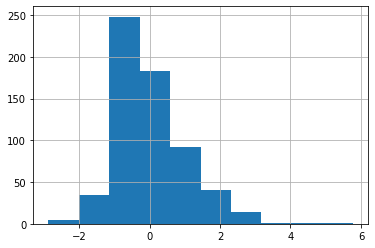

In [400]:
df.abv.hist()

# Ridge

In [556]:
ridge = Ridge(alpha=0.2)
ridge.fit(X_train, y_train)

lasso = Lasso(alpha=0.2)
lasso.fit(X_train, y_train)

lin = LinearRegression()
lin.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [558]:
print(linreg.intercept_)
print(linreg.coef_)

[-0.78024522]
[[-0.05975927  0.50162415  1.12256074  0.94194924  1.02283917  0.94908732]]


In [559]:
print("Ridge Regression Coefficients are:{}".format(ridge.coef_))
print("Ridge Linear Regression Intercept:{}".format(ridge.intercept_))
print("Lasso Regression Coefficients are:{}".format(lasso.coef_))
print("Lasso Linear Regression Intercept:{}".format(lasso.intercept_))

Ridge Regression Coefficients are:[[-0.05995241  0.50124463  1.11169254  0.93175065  1.01465756  0.93591436]]
Ridge Linear Regression Intercept:[-0.77291672]
Lasso Regression Coefficients are:[-0.          0.30987381  0.          0.          0.          0.        ]
Lasso Linear Regression Intercept:[0.01352272]


In [611]:
X_test.shape

(124, 6)

In [612]:
y_h_ridge_train = ridge.predict(X_train)
y_h_ridge_test = ridge.predict(X_test)

y_h_lasso_train = np.reshape(lasso.predict(X_train),(494,1))
y_h_lasso_test = np.reshape(lasso.predict(X_test), (124,1))

y_h_lin_train = lin.predict(X_train)
y_h_lin_test = lin.predict(X_test)

In [613]:
print('Train Error Ridge Model', np.sum((y_train - y_h_ridge_train)**2))
print('Test Error Ridge Model', np.sum((y_test - y_h_ridge_test)**2))
print('\n')

print('Train Error Lasso Model', np.sum((y_train - y_h_lasso_train)**2))
print('Test Error Lasso Model', np.sum((y_test - y_h_lasso_test)**2))
print('\n')

print('Train Error Unpenalized Linear Model', np.sum((y_train - lin.predict(X_train))**2))
print('Test Error Unpenalized Linear Model', np.sum((y_test - lin.predict(X_test))**2))

Train Error Ridge Model ba_score    261.481752
dtype: float64
Test Error Ridge Model ba_score    80.337217
dtype: float64


Train Error Lasso Model ba_score    374.738478
dtype: float64
Test Error Lasso Model ba_score    116.146189
dtype: float64


Train Error Unpenalized Linear Model ba_score    261.473273
dtype: float64
Test Error Unpenalized Linear Model ba_score    80.197858
dtype: float64
